<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Can-we-use-filter-without-aggregating-first-e.g.,--groupby()" data-toc-modified-id="Can-we-use-filter-without-aggregating-first-e.g.,--groupby()-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Can we use filter without aggregating first e.g.,  groupby()</a></span></li><li><span><a href="#Do-you-have-an-alternate-explanation-for-apply/transform/map/agg?" data-toc-modified-id="Do-you-have-an-alternate-explanation-for-apply/transform/map/agg?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Do you have an alternate explanation for apply/transform/map/agg?</a></span></li><li><span><a href="#Can-we-slow-this-down-a-bit?" data-toc-modified-id="Can-we-slow-this-down-a-bit?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Can we slow this down a bit?</a></span></li><li><span><a href="#Missing-Data-and-Outliers" data-toc-modified-id="Missing-Data-and-Outliers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Missing Data and Outliers</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing Values</a></span></li></ul></li><li><span><a href="#Drop-missing-values" data-toc-modified-id="Drop-missing-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Drop missing values</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#Windsorization" data-toc-modified-id="Windsorization-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Windsorization</a></span></li></ul></li></ul></div>

In [2]:
import numpy as np
import pandas as pd


# Can we use filter without aggregating first e.g.,  groupby()

In [3]:
df = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   )
df

,A,B,C,D
0,A8,B8,C8,D8
1,A9,B9,C9,D9
2,A10,B10,C10,D10
3,A11,B11,C11,D11


In [6]:
df.filter(items = ['A', 'D'], axis=1) #iloc  loc

,A,D
0,A8,D8
1,A9,D9
2,A10,D10
3,A11,D11


In [7]:
df.filter(items = [0,1], axis=0)

,A,B,C,D
0,A8,B8,C8,D8
1,A9,B9,C9,D9


# Do you have an alternate explanation for apply/transform/map/agg?

In [ ]:
#https://stackoverflow.com/questions/46210678/whats-the-difference-between-transform-vs-applymap-for-pandas-dataframe

# Can we slow this down a bit?

In [ ]:
# It looks like Saturday will be relatively simple.transform (concat, append, join, merge)
# Maybe we can review apply, groupby, filter, aggregate if/when we finish early?

# Missing Data and Outliers
## Missing Values

In [8]:
id_no = ["P001","P002","P003","P004","P005","P006","P007","P008","P009","P010","P011"]
gender=["M","F","M","F","M","F","M","F","M","F","M"]
status = ["FT","PT","-","FT","PT","PT","FT","-","PT","FT",np.nan]
dept = ["DS","FS","AWS","AWS","DS",np.nan,"FS","FS",np.nan,"DS","AWS"]
V1 = np.array([2,3,5,np.nan,7,1,np.nan,10,14,"-",6])
V2 = np.array([8,np.nan,5,8,11,np.nan,np.nan,2,3,7,9])
salary = np.array([np.nan,54,59,120,58,75,np.nan,136,60,125,np.nan])
df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [9]:
df.info()  #"NaN"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      float64
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


In [10]:
np.nan

nan

In [11]:
type(np.nan)

float

In [13]:
id(np.nan) == id(np.NaN) == id(np.NAN)

True

In [14]:
id(np.nan) == id(np.NaN) == id(np.NAN)==None

False

In [15]:
df.isnull()  #pd.isnull()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [16]:
df.notnull()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [17]:
id(df.notnull ) == id(df.notna)

True

In [22]:
df.isnull().any(axis=0)


id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [23]:
df.isnull().any(axis=1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [24]:
df[ df.isnull().any(axis=1)  ]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
8,P009,M,PT,NaN,14,3.0,60.0
10,P011,M,NaN,AWS,6,9.0,NaN


In [25]:
df[ ~df.isnull().any(axis=1)  ]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
7,P008,F,-,FS,10,2.0,136.0
9,P010,F,FT,DS,-,7.0,125.0


In [26]:
df.isnull().all(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [27]:
df.isnull().all(axis=0)

id        False
gender    False
status    False
dept      False
var1      False
var2      False
salary    False
dtype: bool

In [29]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [30]:
df.isnull().sum().sum()

9

In [31]:
df.isnull().sum() / len(df) * 100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [32]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [37]:
missing = [-9999, ' ', 'nan', '-']
df.replace(missing, np.nan, inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,NaN,AWS,5,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [43]:
missing = [-9999, ' ', 'nan', '-']
df.replace(missing, np.nan, inplace=True)
df["status"].map({"FT":55555, "PT":6666666})  #replacment of keys  with values

0       55555.0
1     6666666.0
2           NaN
3       55555.0
4     6666666.0
5     6666666.0
6       55555.0
7           NaN
8     6666666.0
9       55555.0
10          NaN
Name: status, dtype: float64

In [44]:
id_no = ["P001","P002","P003","P004","P005","P006","P007","P008","P009","P010","P011"]
gender=["M","F","M","F","M","F","M","F","M","F","M"]
status = ["FT","PT","-","FT","PT","PT","FT","-","PT","FT",np.nan]
dept = ["DS","FS","AWS","AWS","DS",np.nan,"FS","FS",np.nan,"DS","AWS"]
V1 = np.array([2,3,5,np.nan,7,1,np.nan,10,14,"-",6])
V2 = np.array([8,np.nan,5,8,11,np.nan,np.nan,2,3,7,9])
salary = np.array([np.nan,54,59,120,58,75,np.nan,136,60,125,np.nan])
df1 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df1

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [45]:
missing = [-9999, ' ', 'nan', '-']
df1.replace(missing, np.nan)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,NaN,AWS,5,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [66]:
df1.replace(['-', 'nan'], np.nan, inplace=True)
df1['var1'] = df1['var1'].astype('int16', errors='ignore')
df1.dtypes

id         object
gender     object
status     object
dept       object
var1      float64
var2      float64
salary    float64
dtype: object

In [67]:
type_mapper = {'var1': 'float', 'var2': 'float32', 'salary': 'int'}
df1.loc[:,'var1':'salary'].astype(dtype=type_mapper, errors='ignore')
df1.dtypes

id         object
gender     object
status     object
dept       object
var1      float64
var2      float64
salary    float64
dtype: object

# Drop missing values

In [72]:
# how:  'any'|'all'
# axis
# inplace = False
# thresh = 0  <at least this many NaN>
# subset <some cols /rows>
df1.dropna(axis=0, how='any', subset=['var2'])


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [73]:
df1

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [74]:
df1.fillna(-999)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,-999.0
1,P002,F,PT,FS,3.0,-999.0,54.0
2,P003,M,-999,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,-999.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,-999,1.0,-999.0,75.0
6,P007,M,FT,FS,-999.0,-999.0,-999.0
7,P008,F,-999,FS,10.0,2.0,136.0
8,P009,M,PT,-999,14.0,3.0,60.0
9,P010,F,FT,DS,-999.0,7.0,125.0


In [75]:
df1['var1'].fillna(-999)

0       2.0
1       3.0
2       5.0
3    -999.0
4       7.0
5       1.0
6    -999.0
7      10.0
8      14.0
9    -999.0
10      6.0
Name: var1, dtype: float64

In [76]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,NaN,AWS,5,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [79]:
df1['var1'].fillna(df1['var1'].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [80]:
df1['var1'].fillna(df1['var1'].median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [81]:
df1['var1'].fillna(df1['var1'].mode())

0      2.0
1      3.0
2      5.0
3      5.0
4      7.0
5      1.0
6     10.0
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [82]:
df1

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [83]:
df1.fillna({"dept":"other", "var1":df1.var1.mean(), "var2":df1.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,other,1.0,7.5,75.0
6,P007,M,FT,FS,6.0,7.5,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,other,14.0,3.0,60.0
9,P010,F,FT,DS,6.0,7.0,125.0


In [84]:
# cond = "Plan A" (what you want)
df1.where(cond=pd.notna(df1), other=df1.mean(), axis = 1)

C:\Users\pat\AppData\Local\Temp/ipykernel_27028/2065186381.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.where(cond=pd.notna(df1), other=df1.mean(), axis = 1)


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,NaN,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [85]:
df1.interpolate()  # 1, 2, NaN, 4  <-- 3  default = 'linear'

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,8.0,75.0
6,P007,M,FT,FS,5.5,5.0,105.5
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


In [86]:
df1

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [87]:
df.fillna(method='bfill')  # 1, 2, NaN, 4   <- 4

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,54.0
1,P002,F,PT,FS,3,5.0,54.0
2,P003,M,FT,AWS,5,5.0,59.0
3,P004,F,FT,AWS,7,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,FS,1,2.0,75.0
6,P007,M,FT,FS,10,2.0,136.0
7,P008,F,PT,FS,10,2.0,136.0
8,P009,M,PT,DS,14,3.0,60.0
9,P010,F,FT,DS,6,7.0,125.0


In [88]:
df.fillna(method='ffill')  # 1, 2, NaN, 4   <- 2

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,8.0,54.0
2,P003,M,PT,AWS,5,5.0,59.0
3,P004,F,FT,AWS,5,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,DS,1,11.0,75.0
6,P007,M,FT,FS,1,11.0,75.0
7,P008,F,FT,FS,10,2.0,136.0
8,P009,M,PT,FS,14,3.0,60.0
9,P010,F,FT,DS,14,7.0,125.0


In [ ]:
# interpolation methods:   linear, quadratic, logrithmic ...

In [90]:
df1.groupby(["status","dept"])["salary"].transform("mean")

0     125.0
1      54.0
2       NaN
3     120.0
4      58.0
5       NaN
6       NaN
7       NaN
8       NaN
9     125.0
10      NaN
Name: salary, dtype: float64

In [91]:
df1["salary"].fillna(df.groupby(["status","dept"])["salary"].transform("mean"), inplace=True)
df1

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


# Outliers

In [92]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='table'>

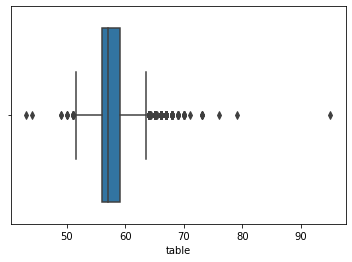

In [93]:
sns.boxplot(x=df.table)

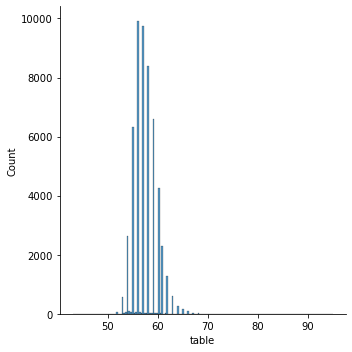

In [96]:
sns.displot(df.table, bins =150, kde=False)

In [102]:
q1 = df.table.quantile(.25)
q3 = df.table.quantile(.75)
print( q1, q3)

56.0 59.0


In [103]:
iqr = q3 - q1

In [104]:
mult = 1.5
lower_lim = q1 - mult * iqr
upper_lim = q3 + mult * iqr
print(lower_lim, upper_lim)

51.5 63.5


In [113]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [111]:
df.describe().loc['75%', 'table']

59.0

In [114]:
not_outliers = (df.table >= lower_lim) & (df.table <= upper_lim)

In [115]:
not_outliers

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [116]:
outlier_index = df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index

In [117]:
outlier_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [119]:
clean = df.drop(outlier_index)

<AxesSubplot:xlabel='table'>

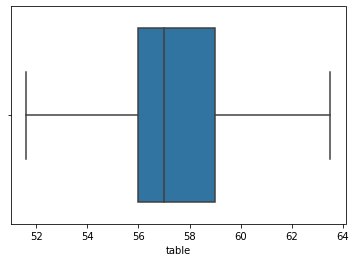

In [120]:
sns.boxplot(x=clean.table)

## Windsorization

In [126]:
from scipy.stats.mstats import winsorize
win = winsorize(df.table, (.02, .03))
print(len(win), len(df.table))

#  applies highest credible value  (98th percentile) and lowest (3rd percentil)

53940 53940


<AxesSubplot:>

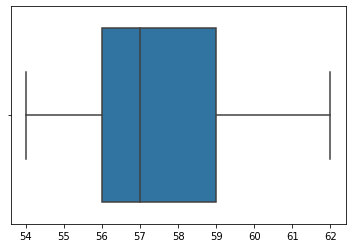

In [125]:
sns.boxplot(x = win)

In [131]:
x = pd.Series(win)

In [133]:
x.sort_values().tail(20)

43077    62.0
3274     62.0
31358    62.0
43074    62.0
43073    62.0
25091    62.0
49119    62.0
6939     62.0
20481    62.0
3985     62.0
43066    62.0
2232     62.0
49113    62.0
49112    62.0
18644    62.0
3991     62.0
43057    62.0
38710    62.0
3271     62.0
13023    62.0
dtype: float64